In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset Creation

In [67]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)



<AxesSubplot:>

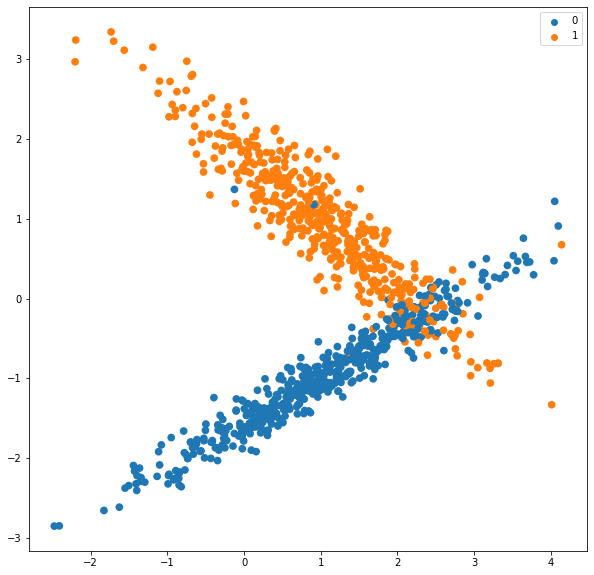

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, s = 60, linewidth = 0)

# 1. Hierarchical Clustering (Agglomerative clustering)

- We will first use Euclidean distance with `linkage = ward` only. 
- In the second step, we will check all other distance and linkage metrics.

<AxesSubplot:>

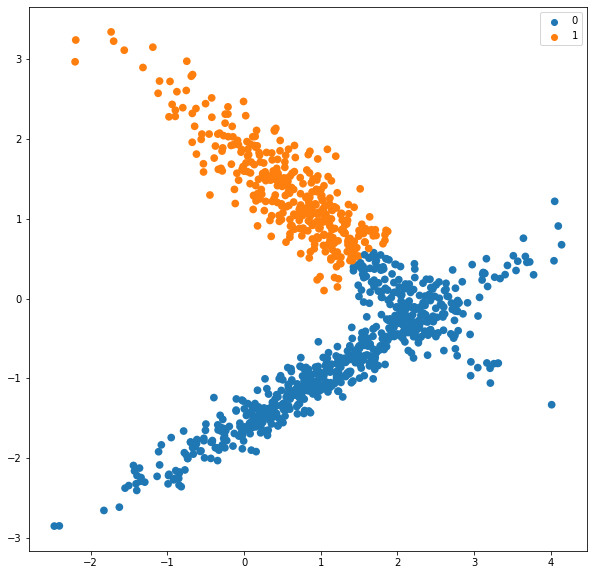

In [6]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 2, affinity="euclidean", linkage = "ward")

y_hat = model.fit_predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, s = 60, linewidth = 0)

- Now, let's try other combinations of `affinity` and `linkage`

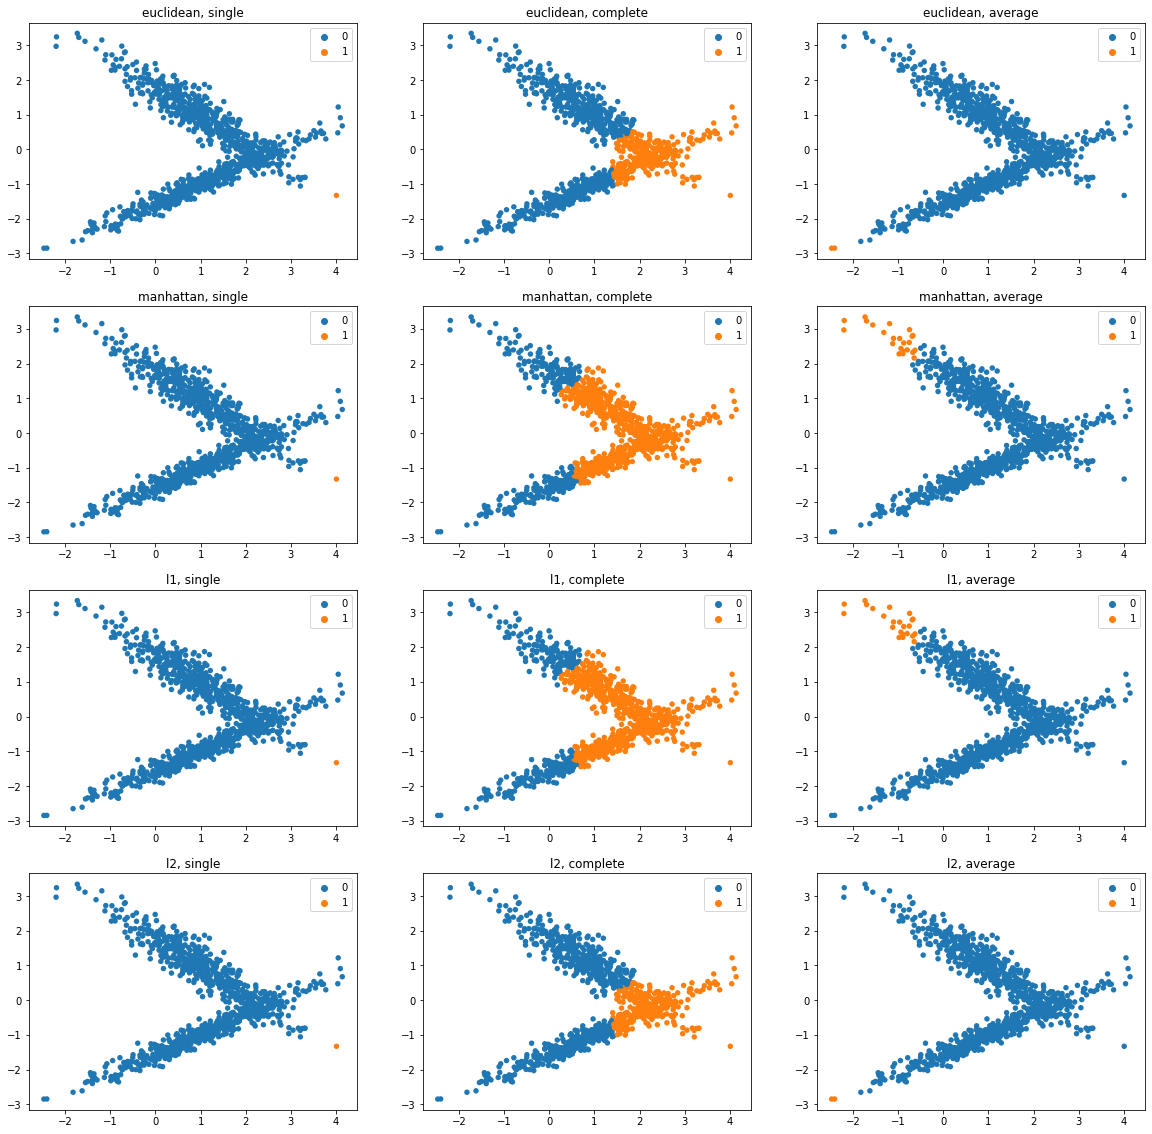

In [30]:
affinity = ["euclidean", "manhattan", "l1", "l2"]
linkage = ["single", "complete", "average"]

figure, axis = plt.subplots(len(affinity), len(linkage), figsize = (20,20)) 

i = 0
for aff in affinity:
    j = 0
    for link in linkage:
        model = AgglomerativeClustering(n_clusters = 2, affinity=aff,
                                        linkage=link)
        y_hat = model.fit_predict(X)

        sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, s = 30, linewidth = 0, ax = axis[i,j])
        axis[i,j].title.set_text(aff+", "+link)
        j+=1
    i+=1

- We can see that `Euclidean` distance function with `ward` as the linkage criteria makes the best combination to form clusters.

# 2. K-Means Clustering

<AxesSubplot:>

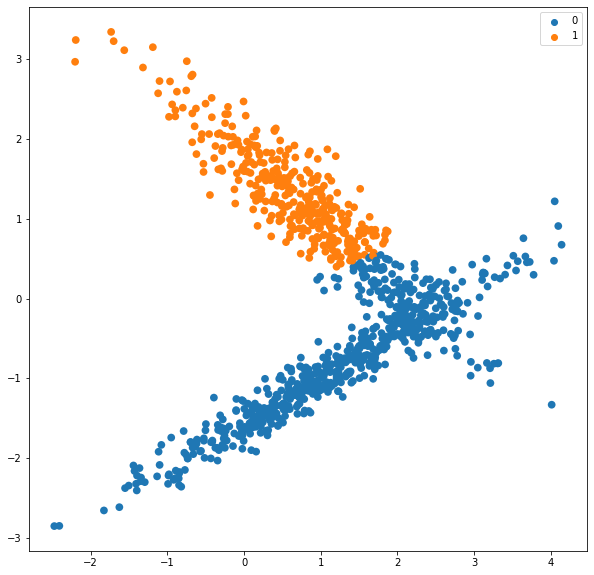

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state = 42)

y_hat = model.fit_predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, s = 60, linewidth = 0)

- Now, just for the sake of covering an important point in K-Means, let's try and check for the optimal number of clusters using **Elbow method**.

<AxesSubplot:>

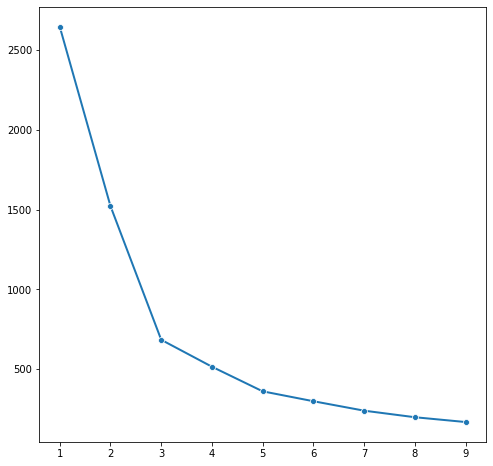

In [41]:
# get WCSS (Within Cluster Sum of Squares)
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

plt.figure(figsize=(8,8))
sns.lineplot(x = K, y = wcss, marker="o", linewidth = 2)

- Let's try making 3 clusters.

<AxesSubplot:>

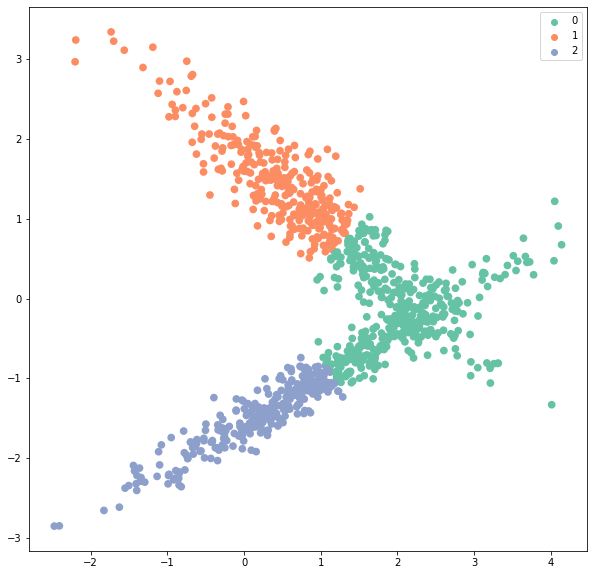

In [47]:
model = KMeans(n_clusters=3, random_state = 42)

y_hat = model.fit_predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, palette = 'Set2', s = 60, linewidth = 0)

# 3. DBSCAN

<AxesSubplot:>

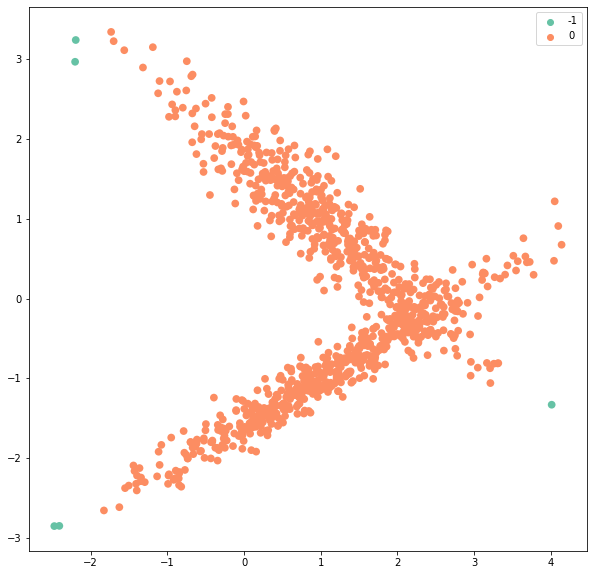

In [51]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.5, min_samples = 5)

y_hat = model.fit_predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, palette = 'Set2', s = 60, linewidth = 0)

- We see that DBSCAN does not do a great job identifying clusters that overlap.
- Let's try finding an optimal value of `eps` using k-distance graph.

In [82]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)  # n_neighbors = k points = minPts
neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances, axis = 0)
print(distances[:5])  # distance from nearest point, including itself, sorted
print(indices[:5])  # index of the nearest point, sorted

[[0.         0.00205967 0.00583525 0.0232909 ]
 [0.         0.00205967 0.00784274 0.02446259]
 [0.         0.00248959 0.00784274 0.02572735]
 [0.         0.00248959 0.01271273 0.02585884]
 [0.         0.00306644 0.01515115 0.0264951 ]]
[[  0 580 772 510]
 [  1  44 617 487]
 [  2 886 767 321]
 [  3 828 427 240]
 [  4 476 360 209]]


In [69]:
mean_distances = [np.mean(x[1:]) for x in distances]
print(mean_distances[:10])

[0.010395272357383314, 0.011454998590979905, 0.012019891225978586, 0.01368705372514977, 0.014904229561815691, 0.015189773185807725, 0.01579182976810165, 0.01603026531754897, 0.016303664879586868, 0.016994951985126388]


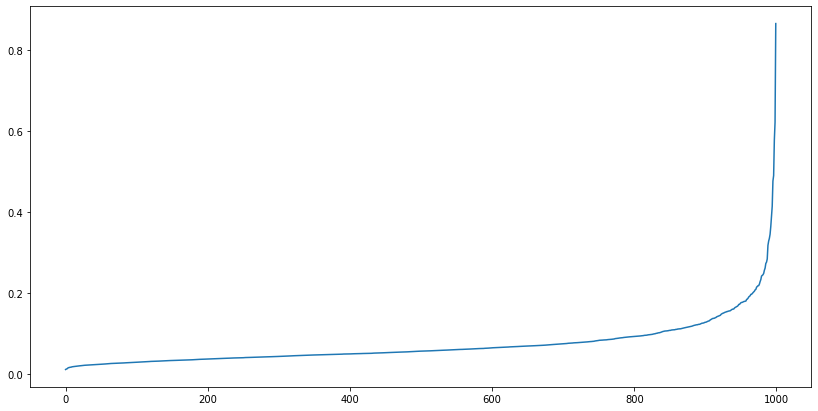

In [84]:
plt.figure(figsize=(14,7))
plt.plot(mean_distances)

According to above plot, the optimal `eps` is somewhere around `0.1 to 0.2`.

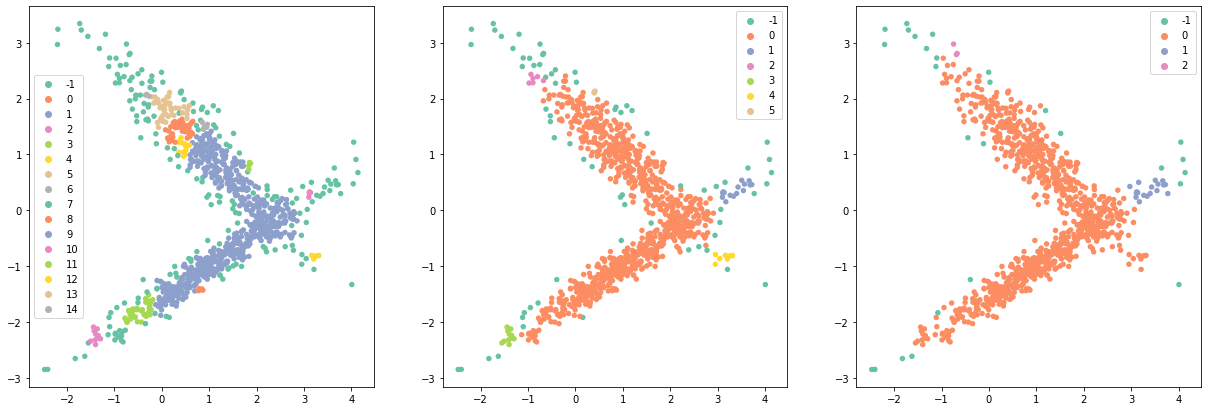

In [93]:
fig, axis = plt.subplots(1, 3, figsize = (21, 7))

i = 0
for eps in [0.1, 0.15, 0.2]:
    model = DBSCAN(eps = eps, min_samples = 4)

    y_hat = model.fit_predict(X)

    sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, palette = 'Set2', s = 30, linewidth = 0, ax = axis[i])
    i+=1

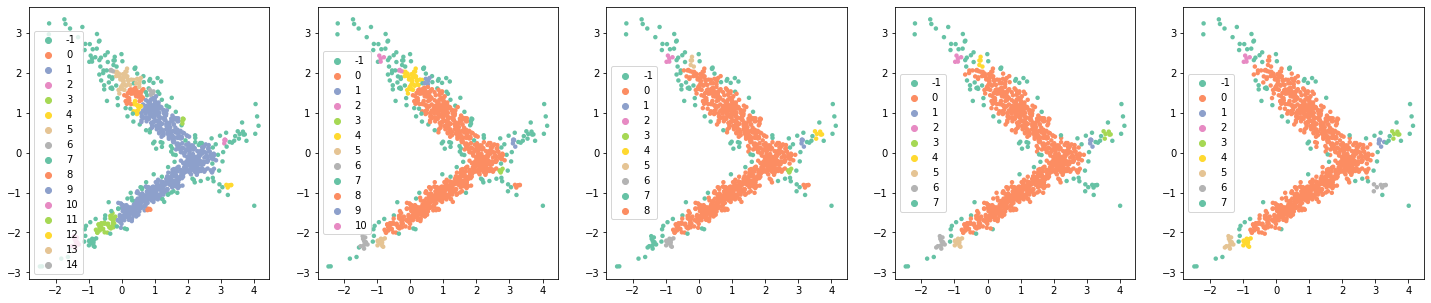

In [91]:
fig, axis = plt.subplots(1, 5, figsize = (25, 5))

i = 0
for eps in np.arange(0.1, 0.15, 0.01):
    model = DBSCAN(eps = eps, min_samples = 4)

    y_hat = model.fit_predict(X)

    sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_hat, palette = 'Set2', s = 20, linewidth = 0, ax = axis[i])
    i+=1